<a href="https://colab.research.google.com/github/krishtech1602/task6/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [2]:
iris=load_iris()
X,y=iris.data,iris.target


In [3]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42,test_size=0.2)

In [6]:
k_values=[1,3,5,7,9]
accuracies=[]

In [7]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")

K=1, Accuracy=0.97
K=3, Accuracy=1.00
K=5, Accuracy=1.00
K=7, Accuracy=1.00
K=9, Accuracy=1.00


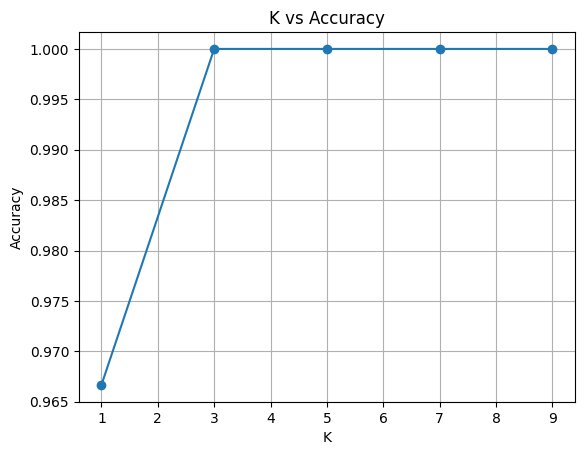

In [8]:
plt.plot(k_values, accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [9]:
best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k}")

Best K: 3


In [10]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

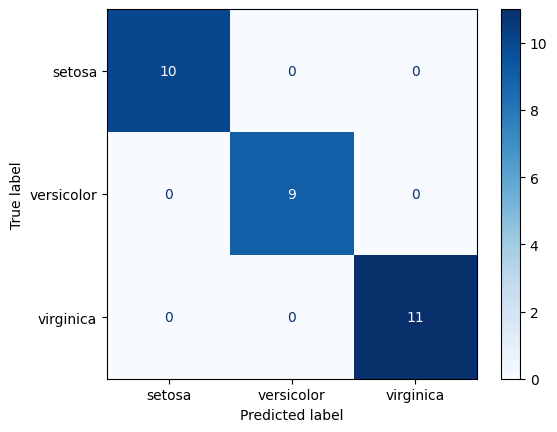

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [12]:
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

In [13]:
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

KNeighborsClassifier(n_neighbors=3)

In [14]:
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

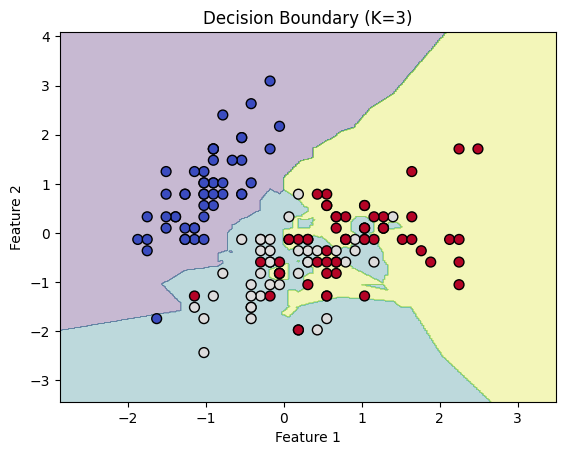

In [15]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.coolwarm)
plt.title(f"Decision Boundary (K={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()